# Simon's Algorithm
### Simon's Problem
If we have an unknown blackbox function $f$, which is either a one-to-one or two-to-one function. Simon's Algorithm finds out whther it is one-to-one or two-to-one accurately. Also, if it is two-to-one then it is according to some hidden bitstring $b$, where:
$$
f(x_1)=f(x_2)\implies x_1\oplus x_2=b
$$
Simon's algorithm also finds out this secret bit string $b$. Therefore, the problem is actually just to determine $b$ because if the function is one-to-one, then the bit string $b$ is just 000....000.
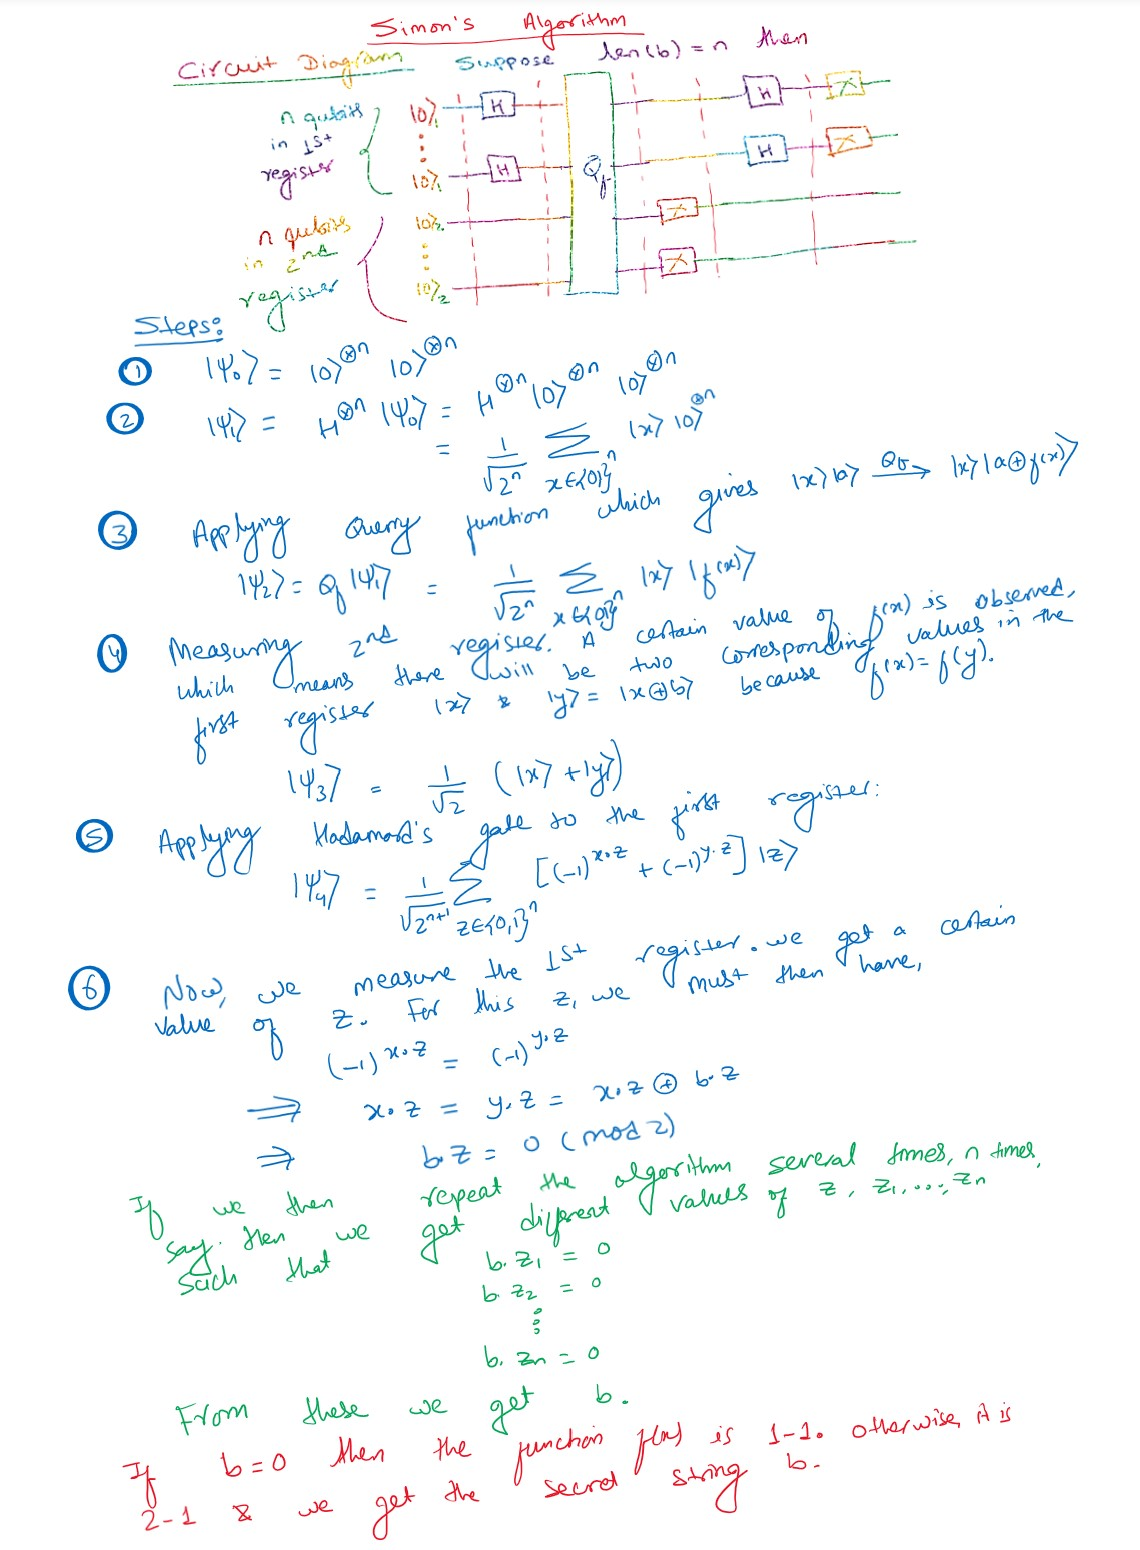

## Qiskit Implementation

In [1]:
# Imports
from qiskit import IBMQ, BasicAer, QuantumCircuit, execute
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

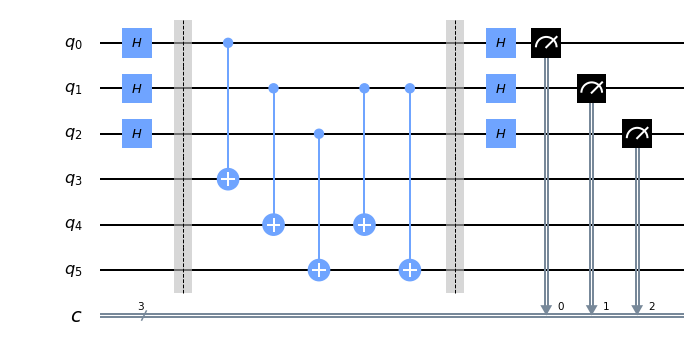

In [2]:
b = '110'
n=len(b)
simon_circuit = QuantumCircuit (n*2,n)

#Applying Hadamard gates to the first n qubits
simon_circuit.h(range(n))
simon_circuit.barrier()

#Adding the oracle
simon_circuit += simon_oracle(b)
simon_circuit.barrier()

# Applying the Hadamard gates again to the first n qubits
simon_circuit.h(range(n))

#measure qubits
simon_circuit.measure(range(n),range(n))

simon_circuit.draw('mpl')

### Using Simulators

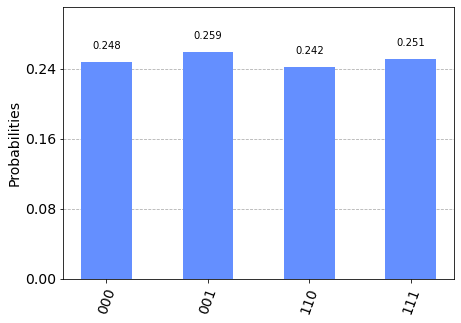

In [3]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
job = execute(simon_circuit, backend = backend, shots=shots)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

In [6]:
# Verifying that b='110'
def bdotz(b,z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    
    return (accum % 2)

for z in counts:
    print('{}.{}={}(mod2)'.format(b,z,bdotz(b,z)))

110.000=0(mod2)
110.110=0(mod2)
110.111=0(mod2)
110.001=0(mod2)


### Using Real IBM Quantum Computer

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
backend = least_busy(provider.backends(filters = lambda x : x.configuration().n_qubits >= n and
                                      not x.configuration().simulator and x.status().operational == True))
print("least busy backend: ",backend)

least busy backend:  ibmq_16_melbourne


In [9]:
from qiskit.tools.monitor import job_monitor
shots = 1024
job = execute(simon_circuit, backend=backend, shots=shots, optimization_level = 3)
job_monitor(job)

Job Status: job has successfully run


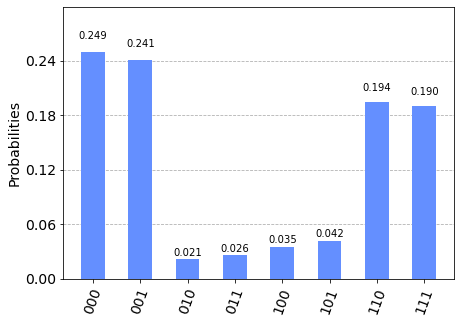

In [10]:
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [11]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))

b = 110
110.101 = 1 (mod 2) (4.2%)
110.100 = 1 (mod 2) (3.5%)
110.000 = 0 (mod 2) (24.9%)
110.110 = 0 (mod 2) (19.4%)
110.010 = 1 (mod 2) (2.1%)
110.011 = 1 (mod 2) (2.6%)
110.001 = 0 (mod 2) (24.1%)
110.111 = 0 (mod 2) (19.0%)


## Creating Simon Oracle